# Wavewriter

a page for generating .wav playalong files over harmonic sequences.  Simple sine waves for now.

In [3]:
#general
import numpy as np
import IPython.display as ipd
# local
import jupyter_pt_tools as jpt_pt
import pt_naming_conventions
import pt_musicutils
import pt_utils
import pt_analyzeaudio
import pt_keypattern

In [23]:
def sequence_maker(start_kpdve, shift_filter, seq_length):
    return np.array([pt_utils.kpdve_add(start_kpdve, shift_filter* i) for i in range(seq_length)])
    
sequence_maker(np.array([0,0,2,4,3]), np.array([0,0,1,0,0]), 3)

array([[0, 0, 2, 4, 3],
       [0, 0, 3, 4, 3],
       [0, 0, 4, 4, 3]])

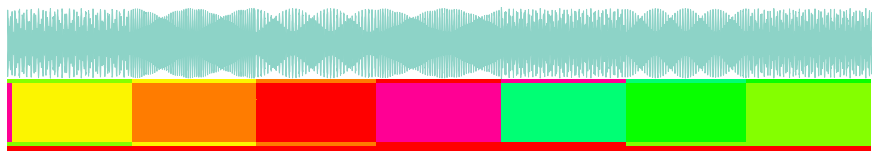

In [59]:
k = 0
p = 0
d_home = 0
k_name = pt_naming_conventions.circle_fifth_notes()[(k + 1)%12]

loops = 1
loopdur = 4
dur = loopdur * loops



six_two_five_one = sequence_maker(np.array([0, 0, 4, 4, 2]), np.array([0, 0, -1, 0, 0]), 4)
six_two_five_one_m = sequence_maker(np.array([0, 5, 4, 4, 2]), np.array([0, 0, -1, 0, 0]), 4)
six_two_five_one_am = sequence_maker(np.array([0, 3, 0, 4, 2]), np.array([0, 0, -1, 0, 0]), 4)
blue_in_green_chords = [46819, 46819, 
                        46947, 46947,
                        48418, 40354, 43235, 43171, 
                        45091, 45091, 
                        46947, 46947, 
                        45347, 45347,
                        2341, 2341,
                        45924, 45924,
                        45347, 45347]
blue_in_green_kpdve = [pt_utils.binary_encoding_to_KPDVE(a_num) for a_num in blue_in_green_chords]
autumn_leaves_kpdve = np.concatenate((six_two_five_one[1:], six_two_five_one_am), axis=0)

chart_dict = {
    "6251" : six_two_five_one,
    "6251m" : six_two_five_one_m,
    "6251aM" : six_two_five_one_am,
    "blue_in_green" : blue_in_green_kpdve,
    "autumn_leaves" : autumn_leaves_kpdve
}

chart_name = "autumn_leaves"
current_chart = chart_dict[chart_name]
filename = k_name + "_" + chart_name

bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in current_chart]
sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
filename = k_name + chart_name + ".wav"
# should divide by max val...
jpt_pt.norm_wave_write(sequence, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=current_chart[-1])
ipd.Audio(filename, rate=4000)

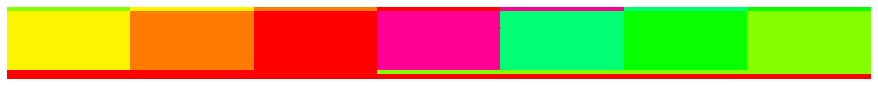

In [54]:
pt_analyzeaudio.graph_kpdve(current_chart)

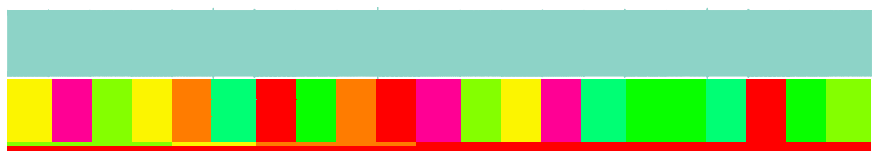

In [55]:
sequence2 =jpt_pt.link_wavestep_sequences(bin_seq, duration=dur)
filename = k_name + chart_name + "_step.wav"

jpt_pt.norm_wave_write(sequence2, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=current_chart[-1])
ipd.Audio(filename, rate=4000)

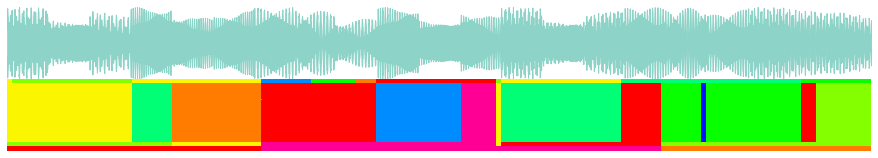

In [56]:
filename = k_name + chart_name + "_combo.wav"

sequence3 = sequence +  sequence2
jpt_pt.norm_wave_write(sequence3, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.3, key_orientation=current_chart[-1])
ipd.Audio(filename, rate=4000)

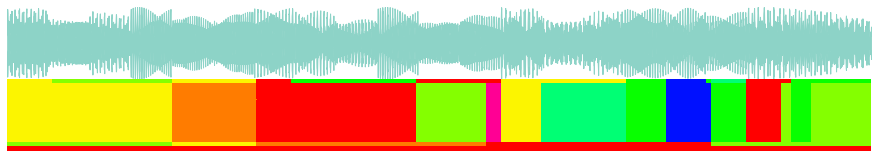

In [57]:
filename = k_name + chart_name + "_combo_bass.wav"

bin_seq = [pt_musicutils.circle_root_note_for_KPDVE(a_kpdve) for a_kpdve in current_chart]

sequence4 = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur, from_middle_c=-1)
sequence4 += sequence3
jpt_pt.norm_wave_write(sequence4, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=current_chart[-1])
ipd.Audio(filename, rate=4000)

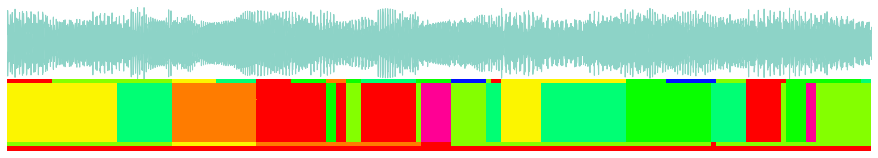

In [58]:
filename = k_name + chart_name + "_combo_bass_scales.wav"
bin_seq = [pt_keypattern.get_binary_KP(a_kpdve[0], a_kpdve[1]) for a_kpdve in current_chart]

sequence5 = jpt_pt.link_wavestep_sequences(bin_seq, duration=dur, from_middle_c=1)
sequence5 += sequence4
jpt_pt.norm_wave_write(sequence5, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=current_chart[-1])
ipd.Audio(filename, rate=4000)